In [1]:
from PIL import Image
from config import IMG_DIR, BBOXES_DIR, YOLO_DATA_DIR
import os
from data_preprocessing.draw_bboxes import draw_yolo_bboxes
from data_preprocessing.class_distribution import *

In [11]:
YOLO_CW2_IMG_DIR_TRAIN = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/images/train/')
YOLO_CW2_IMG_DIR_VAL = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/images/val/')
YOLO_CW2_IMG_DIR_TEST = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/images/test/')
YOLO_CW2_LABEL_DIR_TRAIN = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/labels/train/')

example_image_yolo = os.path.join(YOLO_CW2_IMG_DIR_TRAIN, 'ave-0178-0015.jpg')
example_label_yolo = os.path.join(YOLO_CW2_LABEL_DIR_TRAIN, 'ave-0178-0015.txt')

example_image_for_thesis = os.path.join(YOLO_CW2_IMG_DIR_TRAIN, "ave-0140-0013.jpg")
example_label_for_thesis = os.path.join(YOLO_CW2_LABEL_DIR_TRAIN, "ave-0140-0013.txt")

YOLO_CW2_EVAL_IMG_DIR_TRAIN = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/images/train/')
YOLO_CW2_EVAL_LABEL_DIR_TRAIN = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/labels/train/')
example_image_yolo_eval = os.path.join(YOLO_CW2_EVAL_IMG_DIR_TRAIN, 'ave-0178-0015.jpg')
example_label_yolo_eval = os.path.join(YOLO_CW2_EVAL_LABEL_DIR_TRAIN, 'ave-0178-0015.txt')

# Explore source images

## Source image size, count of all images, show example image

In [3]:
# Check the size of an example src image
example_image = os.path.join(IMG_DIR, 'ave-0035-0014.jpg')
example_image = Image.open(example_image)
example_image.size

(1920, 1088)

In [4]:
# show the example image
example_image.show()

In [5]:
# Check the number of images in the image directory
len(os.listdir(IMG_DIR))

8034

## Count labels for each Dataset Variant

In [14]:
# Check the number of annotation files in each labels subdir
for subdir in os.listdir(BBOXES_DIR):
    print(subdir, len(os.listdir(os.path.join(BBOXES_DIR, subdir))))

print("CropOrWeed2Eval", len(os.listdir(os.path.join(BBOXES_DIR, "CropOrWeed2Eval"))))

Bean1 229
Bean1Eval 8034
Bean2 7752
Bean2Eval 8035
Coarse1 7801
Coarse1Eval 8035
CropAndWeed 8034
CropOrWeed2 7706
CropOrWeed2Eval 8035
CropsOrWeed9 7706
CropsOrWeed9Eval 8035
Fine24 7706
Fine24Eval 8035
Maize1 1835
Maize1Eval 8035
Maize2 7752
Maize2Eval 8035
Pea1 177
Pea1Eval 8035
Pea2 7752
Pea2Eval 8035
Potato1 109
Potato1Eval 8035
Potato2 7752
Potato2Eval 8035
Pumpkin1 318
Pumpkin1Eval 8035
Pumpkin2 7752
Pumpkin2Eval 8035
Soy1 337
Soy1Eval 8035
Soy2 7752
Soy2Eval 8035
SugarBeet1 1211
SugarBeet1Eval 8035
SugarBeet2 7752
SugarBeet2Eval 8035
Sunflower1 591
Sunflower1Eval 8035
Sunflower2 7752
Sunflower2Eval 8035
CropOrWeed2Eval 8035


In [8]:
def count_bboxes_in_labels(folder_path):
    total_bboxes = 0

    for label_file in os.listdir(folder_path):

        file_path = os.path.join(folder_path, label_file)

        with open(file_path, "r") as f:
            bbox_count = sum(1 for line in f)
            total_bboxes += bbox_count

    return total_bboxes

In [9]:
count_bboxes_in_labels(os.path.join(BBOXES_DIR, "Coarse1"))

223907

In [10]:
count_bboxes_in_labels(os.path.join(BBOXES_DIR, "Coarse1Eval"))

223907

# Explore dataset variants after creation with YOLODataclass

## Check images and labels in each split subdir

In [11]:
YOLO_CW2_IMG_DIR = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/images/')
for subdir in os.listdir(YOLO_CW2_IMG_DIR):
    print(subdir, len(os.listdir(os.path.join(YOLO_CW2_IMG_DIR, subdir))))
    
print(sum([len(os.listdir(os.path.join(YOLO_CW2_IMG_DIR, subdir))) for subdir in os.listdir(YOLO_CW2_IMG_DIR)]))

YOLO_CW2_LABEL_DIR = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/labels/')
for subdir in os.listdir(YOLO_CW2_LABEL_DIR):
    print(subdir, len(os.listdir(os.path.join(YOLO_CW2_LABEL_DIR, subdir))))

print(sum([len(os.listdir(os.path.join(YOLO_CW2_LABEL_DIR, subdir))) for subdir in os.listdir(YOLO_CW2_LABEL_DIR)]))

test 1206
train 5623
val 1205
8034
test 1153
train 5391
val 1161
7705


In [15]:
YOLO_CW2_EVAL_IMG_DIR = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/images/')
for subdir in os.listdir(YOLO_CW2_EVAL_IMG_DIR):
    print(subdir, len(os.listdir(os.path.join(YOLO_CW2_EVAL_IMG_DIR, subdir))))

print(sum([len(os.listdir(os.path.join(YOLO_CW2_EVAL_IMG_DIR, subdir))) for subdir in os.listdir(YOLO_CW2_EVAL_IMG_DIR)]))

YOLO_CW2_EVAL_LABEL_DIR = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/labels/')
for subdir in os.listdir(YOLO_CW2_EVAL_LABEL_DIR):
    print(subdir, len(os.listdir(os.path.join(YOLO_CW2_EVAL_LABEL_DIR, subdir))))

print(sum([len(os.listdir(os.path.join(YOLO_CW2_EVAL_LABEL_DIR, subdir))) for subdir in os.listdir(YOLO_CW2_EVAL_LABEL_DIR)]))

test 1206
train 5623
val 1205
8034
test 1206
train 5623
val 1205
8034


In [11]:
YOLO_COARSE1_IMG_DIR = os.path.join(YOLO_DATA_DIR, 'Coarse1/images/')
for subdir in os.listdir(YOLO_COARSE1_IMG_DIR):
    print(subdir, len(os.listdir(os.path.join(YOLO_COARSE1_IMG_DIR, subdir))))

print(sum([len(os.listdir(os.path.join(YOLO_COARSE1_IMG_DIR, subdir))) for subdir in os.listdir(YOLO_COARSE1_IMG_DIR)]))

YOLO_COARSE1_LABEL_DIR = os.path.join(YOLO_DATA_DIR, 'Coarse1/labels/')
for subdir in os.listdir(YOLO_COARSE1_LABEL_DIR):
    print(subdir, len(os.listdir(os.path.join(YOLO_COARSE1_LABEL_DIR, subdir))))

print(sum([len(os.listdir(os.path.join(YOLO_COARSE1_LABEL_DIR, subdir))) for subdir in os.listdir(YOLO_COARSE1_LABEL_DIR)]))

test 1206
train 5623
val 1205
8034
test 1206
train 5623
val 1205
8034


In [12]:
def get_all_images_in_split(split_dir):
    return set(os.listdir(split_dir))

train_images = get_all_images_in_split(YOLO_CW2_IMG_DIR_TRAIN)
val_images = get_all_images_in_split(YOLO_CW2_IMG_DIR_VAL)
test_images = get_all_images_in_split(YOLO_CW2_IMG_DIR_TEST)

# Überprüfen auf Überschneidungen
overlap_train_val = train_images.intersection(val_images)
overlap_train_test = train_images.intersection(test_images)
overlap_val_test = val_images.intersection(test_images)

print(f"Train-Val Overlap: {len(overlap_train_val)}")
print(f"Train-Test Overlap: {len(overlap_train_test)}")
print(f"Val-Test Overlap: {len(overlap_val_test)}")

Train-Val Overlap: 0
Train-Test Overlap: 0
Val-Test Overlap: 0


## Drwa bboxes on example image in Yolo format

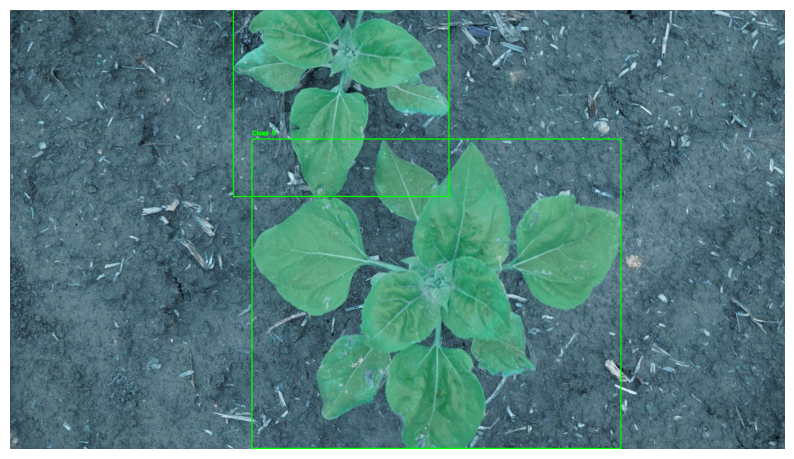

array([[[ 82, 116, 122],
        [ 82, 114, 120],
        [ 74, 103, 110],
        ...,
        [ 81, 111, 122],
        [ 80, 108, 119],
        [ 54,  82,  93]],

       [[ 76, 110, 116],
        [ 89, 121, 127],
        [ 87, 116, 123],
        ...,
        [ 83, 113, 124],
        [ 82, 110, 121],
        [ 75, 103, 114]],

       [[ 64,  98, 104],
        [ 72, 104, 110],
        [ 84, 113, 120],
        ...,
        [ 81, 111, 122],
        [ 79, 109, 120],
        [ 72, 102, 113]],

       ...,

       [[ 60,  88,  99],
        [ 78, 106, 117],
        [ 82, 110, 121],
        ...,
        [ 58,  87, 101],
        [ 61,  89, 100],
        [ 81, 109, 120]],

       [[ 79, 105, 117],
        [ 91, 117, 129],
        [ 82, 109, 119],
        ...,
        [ 73, 102, 116],
        [ 67,  94, 108],
        [ 77, 104, 118]],

       [[ 85, 111, 123],
        [ 93, 119, 131],
        [ 96, 123, 133],
        ...,
        [ 69, 101, 114],
        [ 70,  97, 111],
        [ 69,  96, 110]]

In [5]:

draw_yolo_bboxes(example_image_for_thesis, example_label_for_thesis, img_show=True)

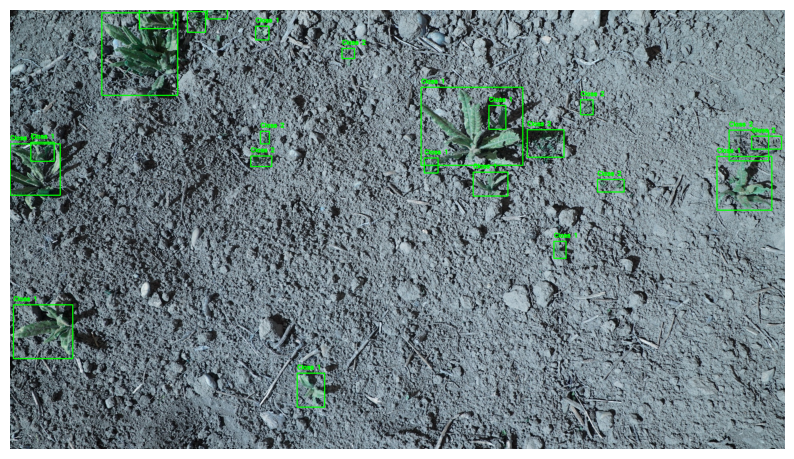

array([[[ 31,  30,  32],
        [ 35,  37,  38],
        [ 31,  33,  34],
        ...,
        [ 64,  81,  84],
        [149, 161, 167],
        [146, 155, 164]],

       [[ 29,  28,  30],
        [ 20,  19,  21],
        [ 12,  14,  15],
        ...,
        [132, 149, 152],
        [ 96, 108, 114],
        [141, 152, 160]],

       [[ 21,  20,  22],
        [ 10,   9,  11],
        [  8,  10,  11],
        ...,
        [133, 152, 155],
        [123, 137, 143],
        [138, 151, 159]],

       ...,

       [[136, 150, 156],
        [146, 160, 166],
        [ 36,  48,  54],
        ...,
        [ 39,  50,  58],
        [129, 139, 146],
        [161, 171, 178]],

       [[ 44,  56,  62],
        [ 22,  32,  39],
        [  6,  16,  23],
        ...,
        [ 98, 109, 117],
        [ 62,  72,  79],
        [116, 124, 131]],

       [[ 28,  38,  45],
        [ 18,  28,  35],
        [ 23,  31,  38],
        ...,
        [147, 158, 166],
        [101, 111, 118],
        [ 91,  99, 106]]

In [12]:
draw_yolo_bboxes(example_image_yolo_eval, example_label_yolo_eval, img_show=True)

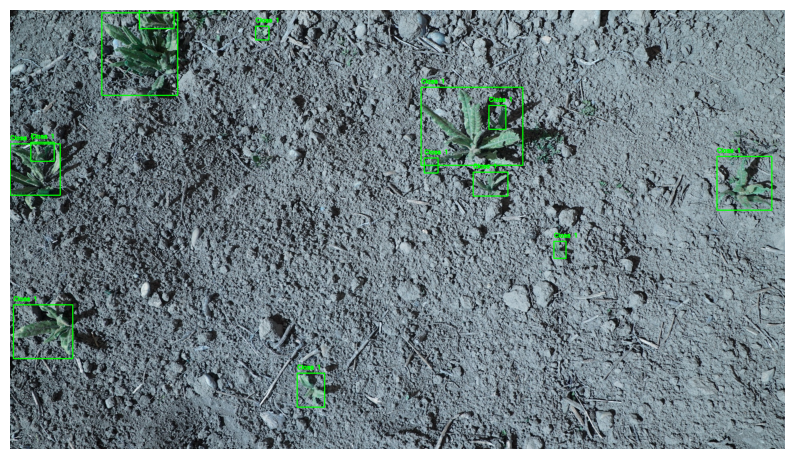

array([[[ 31,  30,  32],
        [ 35,  37,  38],
        [ 31,  33,  34],
        ...,
        [ 64,  81,  84],
        [149, 161, 167],
        [146, 155, 164]],

       [[ 29,  28,  30],
        [ 20,  19,  21],
        [ 12,  14,  15],
        ...,
        [132, 149, 152],
        [ 96, 108, 114],
        [141, 152, 160]],

       [[ 21,  20,  22],
        [ 10,   9,  11],
        [  8,  10,  11],
        ...,
        [133, 152, 155],
        [123, 137, 143],
        [138, 151, 159]],

       ...,

       [[136, 150, 156],
        [146, 160, 166],
        [ 36,  48,  54],
        ...,
        [ 39,  50,  58],
        [129, 139, 146],
        [161, 171, 178]],

       [[ 44,  56,  62],
        [ 22,  32,  39],
        [  6,  16,  23],
        ...,
        [ 98, 109, 117],
        [ 62,  72,  79],
        [116, 124, 131]],

       [[ 28,  38,  45],
        [ 18,  28,  35],
        [ 23,  31,  38],
        ...,
        [147, 158, 166],
        [101, 111, 118],
        [ 91,  99, 106]]

In [13]:
draw_yolo_bboxes(example_image_yolo, example_label_yolo, img_show=True)

## Explore class distribution of the dataset variants

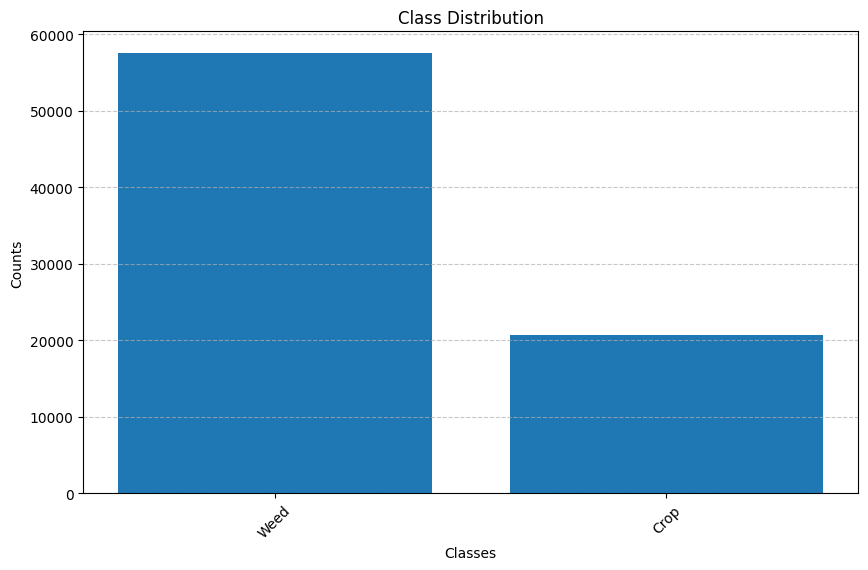

In [14]:
# Class distribution of the CropOrWeed2 dataset
YOLO_CW2_LABEL_DIR_TRAIN = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/labels/train/')
YOLO_CW2_LABEL_DIR_TEST = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/labels/test/')
YOLO_CW2_LABEL_DIR_VAL = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/labels/val/')
YOLO_CW2_YAML = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2/CropOrWeed2.yaml')

label_dirs = [
    YOLO_CW2_LABEL_DIR_TRAIN,
    YOLO_CW2_LABEL_DIR_TEST,
    YOLO_CW2_LABEL_DIR_VAL
]

class_names = load_class_names(YOLO_CW2_YAML)

class_counter = get_class_distribution(label_dirs)

plot_class_distribution(class_counter, class_names)

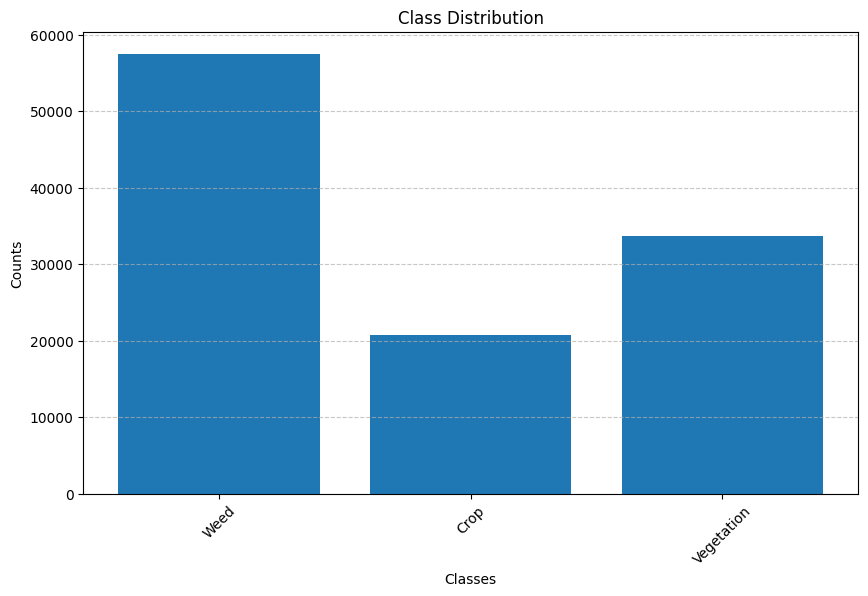

In [6]:
# Class distribution of the CropOrWeed2Eval dataset
YOLO_CW2_EVAL_LABEL_DIR_TRAIN = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/labels/train/')
YOLO_CW2_EVAL_LABEL_DIR_TEST = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/labels/test/')
YOLO_CW2_EVAL_LABEL_DIR_VAL = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/labels/val/')
YOLO_CW2_EVAL_YAML = os.path.join(YOLO_DATA_DIR, 'CropOrWeed2Eval/CropOrWeed2Eval.yaml')

label_dirs = [
    YOLO_CW2_EVAL_LABEL_DIR_TRAIN,
    YOLO_CW2_EVAL_LABEL_DIR_TEST,
    YOLO_CW2_EVAL_LABEL_DIR_VAL
]

class_names = load_class_names(YOLO_CW2_EVAL_YAML)

class_counter = get_class_distribution(label_dirs)

plot_class_distribution(class_counter, class_names)

In [ ]:
def count_bboxes_in_labels(folder_path):
    """
    Zählt die Anzahl der Bounding Boxes in jeder Label-Datei und gibt die Gesamtanzahl aus.

    Args:
        folder_path (str): Pfad zum Ordner mit den Label-Dateien.

    Returns:
        None
    """
    total_bboxes = 0

    # Iteriere über alle Dateien im Ordner
    for label_file in os.listdir(folder_path):
        if label_file.endswith(".txt"):  # Nur Textdateien betrachten
            file_path = os.path.join(folder_path, label_file)

            # Öffne die Datei und zähle die Zeilen
            with open(file_path, "r") as f:
                bbox_count = sum(1 for line in f)
                total_bboxes += bbox_count

            print(f"{label_file}: {bbox_count} Einträge")

    print(f"Gesamtanzahl der Einträge: {total_bboxes}")

In [ ]:
count_bboxes_in_labels()